# NE 536 HW 4
## Micah Gale

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Problem 4.1 Secular Equilibrium


We have the classic Bateman equation:

$$ \frac{dN_2}{dt} = R - \lambda N_2$$

We can do some algebra that is not at all hacky (and change the time derivative to $\dot{N_2}$:

$$\frac{\dot{N_2}}{R - \lambda N_2} = 1$$

Next this can be integrated:

$$\int\frac{\dot{N_2}}{R - \lambda N_2}dt  = \int 1 dt$$

This will have an $\ln$, and we can do some tricks on the left hand side


Then defining $u = R-\lambda N_2$, and $du = -\lambda N_2$.

$$\frac{-1}{\lambda} \int \frac{dN_2}{\frac{R}{\lambda} - N_2}$$

$$ \frac{-1}{\lambda} \int \frac{du}{u}$$

$$ \frac{-\ln(u)}{\lambda}$$

$$ \frac{-\ln(R - \lambda N_2)}{\lambda}$$

Then combining this with the whole equation and solving for $N_2$ ($c$, the constant can just absorb any operators since it's an arbitrary integration constant).

$$ \frac{-\ln(R - \lambda N_2)}{\lambda} = t + c$$

$$\ln(R - \lambda N_2) = -\lambda t - \lambda c$$
$$R - \lambda N_2 = e^{-\lambda t - c}$$
$$- \lambda N_2 = ce^{-\lambda t} - R$$
$$N_2 = \frac{R}{\lambda}- ce^{-\lambda t} $$

Solve for constant, if we assume $N_2(t=0) = 0$ then:

$$ 0 = \frac{R}{\lambda} - c$$

$$ c = \frac{R}{\lambda}$$

$$N_2(t) = \frac{R}{\lambda}\left(1-e^{-\lambda t}\right)$$

### Problem 4.1a,2: solve for steady state

At steady-state, by defition, $\frac{dN_2}{dt} = 0$.

$$ 0 = R - \lambda N_2$$

$$ N_2 = \frac{R}{\lambda}$$

## Problem 4.1b: Plot

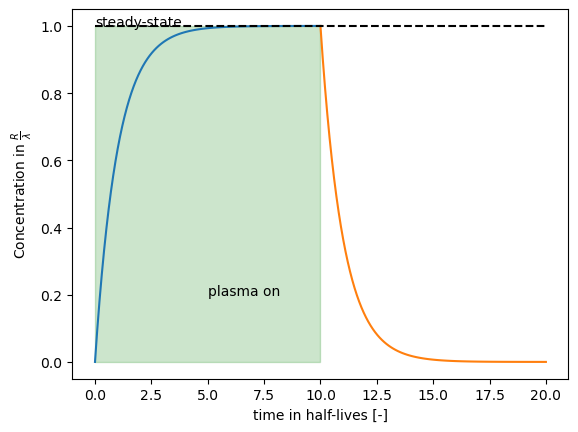

In [2]:
R = 1.0
lamb = 1
powered_on = lambda t: R/lamb * (1 - np.exp(-lamb * t))
powered_off = lambda t, offset: R/lamb * np.exp(-lamb * (t-offset))

t = np.linspace(0, 10, 100)
plt.plot(t, powered_on(t))
plt.fill_between(t, [1]*len(t), alpha= 0.2, color="green")
plt.annotate("plasma on", (5, 0.2))
t = np.linspace(10, 20, 100)
plt.plot(t, powered_off(t, 10))
plt.xlabel("time in half-lives [-]")
plt.ylabel(r"Concentration in $\frac{R}{\lambda}$")
plt.plot([0, 20], [1]*2, "k--")
_=plt.annotate("steady-state", (0, 1))


# Problem 4.2 

The Bateman equation was orginally formulated in the 1910s by Bateman to describe radioactive decay. 
The modern form adds source terms from nuclear reactions. 
The Bateman equation is a (coupled system of) linear ordinary differential equation(s) describing the time derivative of a nuclides concentration.

The file given models the decay chain for No-256 decaying eventually int Th-232, which then decays into other isotopes like Ra-224 and Rn-220. The initial condition is that there are only No-256 to start off (Some how I cannot figure out how you coded this).

This code seems to solve the system of Bateman equations using Euler's method for integration. 

Side note: you should check out [`np.logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html), and [`np.geomspace`](https://numpy.org/doc/stable/reference/generated/numpy.geomspace.html).

Other side note: the state of the art method is the Chebyshev Rational Aproximation Method (CRAM). It's amazingly accurate and efficient. With just 9 matrix operations it is able to calculate nuclide concentrations thousands of half-lives in the future with ~1e-15 error. [CRAM](https://doi.org/10.13182/NSE10-81)

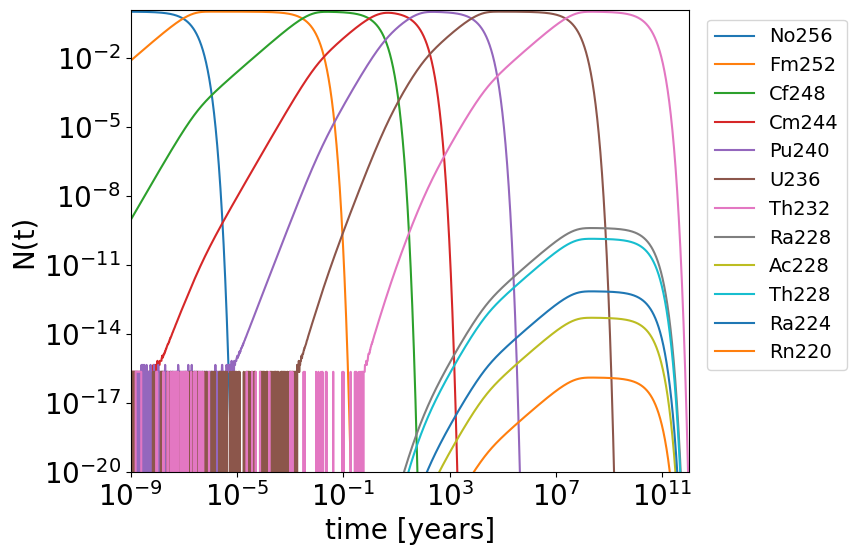

In [3]:
import bateman
bateman.main()

As can be seen this begins as a decay limited reaction where for the beginning of the chain one isotope decays to another (e.g., No-256 to Fm-252). 
At the beginning the half-lifes are similar enough that one isotope replaces the next. 
Towards the end of the decay chain there is a mismatch where the products from Th-232 decay much faster than their parent.
This leads to a pile up where multiple nuclides are present at the same time.

# Problem 4.3 Molybdebum in Fusion

Fun fact: ALCATOR C-mod is the reason I learned how to spell moly. 

* The most common nuclide of moly is Mo-98 at 24.39%, so it's guaruntee that this is the problematic isotope.

    * The most common activation reaction is an $(n,\gamma)$ for Mo-98 which will produce Mo-99.
 
    * Mo-99 has 65.94 hour half-life, and only beta decays to Tc-99. This is how Tc-99m is produced for medical procedures. The radiopharmacy is sent a "generator" that is a plate of Mo that they will continuously separate the technetium from.
 
    * 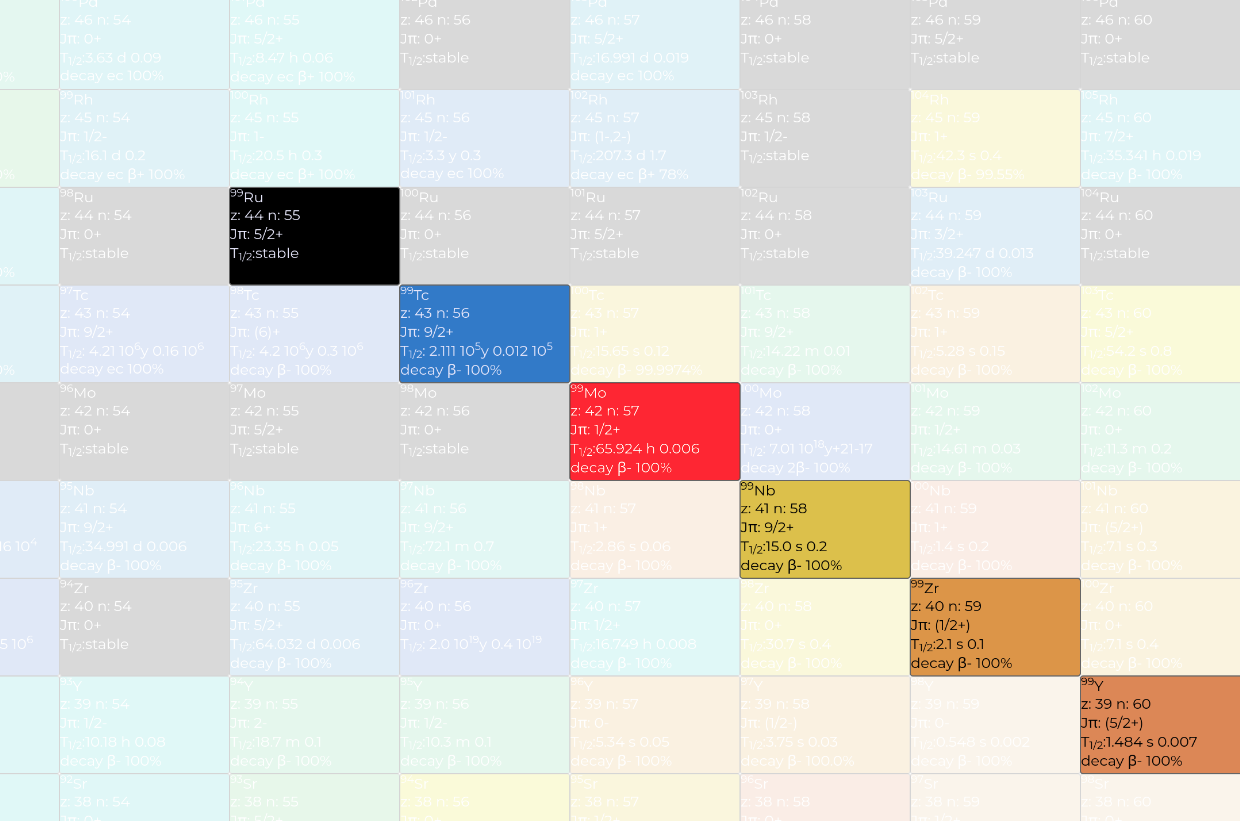
 
Molybdenum is excluded from RAFM steels in part because of the production of Tc-99. Tc-99 (groundstate) has a half-life of 200,000 years. Not only with this be radioactive for a long time, but also this means that no steady-state concentration will be created by decay. Rather the only way to limit the build-up of Tc-99 would be for it to have a large capture cross-section. This does not appear to be the case. This is also excluding all of the reaction chains possible for the other five natural moly isotopes.